In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
#   Pandas' Object split => apply => conmbine

In [19]:
df = DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'],
               'key2': ['one', 'two', 'one', 'two', 'one'],
               'data1': np.random.randn(5),
               'data2': np.random.randn(5)})
df
grouped = df['data1'].groupby(df['key1'])
grouped
grouped.mean()
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means
means.unstack()#   最内层
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()
df.groupby('key1').mean()#   ‘key2’不是数值列，被移除，默认聚合数值列
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [23]:
#for name, group in df.groupby('key1'):
#    print(name)
#    print(group)
#for (k1, k2), group in df.groupby(['key1', 'key2']):
#    print(k1, k2)
#    print(group)

a one
  key1 key2     data1     data2
0    a  one  1.862257 -0.203398
4    a  one  0.766146 -1.516581
a two
  key1 key2     data1     data2
1    a  two -0.592477  0.043537
b one
  key1 key2    data1     data2
2    b  one  1.31955 -1.168335
b two
  key1 key2     data1     data2
3    b  two -0.014296  2.402627


In [38]:
pieces = dict(list(df.groupby('key1')))
pieces
#pieces['b']
df.dtypes
grouped = df.groupby(df.dtypes, axis = 1)
dict(list(grouped))
df['data1'].groupby(df['key1'])
df.groupby('key1')['data1']
df.groupby(['key1', 'key2'])['data2'].mean()

key1  key2
a     one    -0.859990
      two     0.043537
b     one    -1.168335
      two     2.402627
Name: data2, dtype: float64

In [52]:
#   利用map（Series）分组
people = DataFrame(np.random.randn(5, 5), columns = ['a', 'b', 'c', 'd', 'e'],
                  index = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people
people.loc[2: 3, ['b', 'c']] = np.nan
people
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
          'd': 'blue', 'e': 'red', 'f': 'orange'}
by_column = people.groupby(mapping, axis = 1)
by_column.sum()
map_series = Series(mapping)
map_series
people.groupby(map_series, axis = 1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [60]:
#   利用函数分组
people.groupby(len).count()
key_list = ['one', 'one', 'one', 'two', 'two']#   index的别名（先这么理解）
#key_list = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis'] 
people.groupby([len, key_list]).count()

a  b  c  d  e
3 Jim     1  1  1  1  1
  Joe     1  1  1  1  1
  Wes     1  0  0  1  1
5 Steve   1  1  1  1  1
6 Travis  1  1  1  1  1

In [70]:
#   层次化索引，索引级别进行聚合 pram => level
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names = ['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns = columns)
hier_df
columns
hier_df.groupby(level = 'cty', axis = 1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [85]:
df
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)
grouped.aggregate(peak_to_peak)
grouped.describe().stack()

data1     data2
key1                          
a    count  3.000000  3.000000
     mean   0.678642 -0.558814
     std    1.229704  0.838589
     min   -0.592477 -1.516581
     25%    0.086835 -0.859990
     50%    0.766146 -0.203398
     75%    1.314202 -0.079931
     max    1.862257  0.043537
b    count  2.000000  2.000000
     mean   0.652627  0.617146
     std    0.943172  2.525051
     min   -0.014296 -1.168335
     25%    0.319166 -0.275595
     50%    0.652627  0.617146
     75%    0.986089  1.509886
     max    1.319550  2.402627

In [94]:
tips = pd.read_csv('/home/haoran/文档/exm/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[: 6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [117]:
#   不同的列不同的聚合
grouped = tips.groupby(['smoker', 'time'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')
grouped_pct.agg(['mean', 'std', peak_to_peak])
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])
functions = ['count', 'mean', 'max', peak_to_peak]
result = grouped['tip_pct', 'total_bill'].agg(functions)
result
result['tip_pct']
ftuples = [('DUbejd', 'mean'), ('Anwdo', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)
grouped.agg({'tip': np.max, 'size': 'sum'})
grouped.agg({'tip': ['min', 'max', 'mean', 'std'], 'size': 'sum'})
#   无索引
tips.groupby(['smoker', 'time'], as_index = False).mean()

,smoker,time,total_bill,tip,size,tip_pct
0,No,Dinner,20.095660,3.126887,2.735849,0.158653
1,No,Lunch,17.050889,2.673778,2.511111,0.160920
2,Yes,Dinner,21.859429,3.066000,2.471429,0.160828
3,Yes,Lunch,17.399130,2.834348,2.217391,0.170404


In [143]:
df
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means
pd.merge(df, k1_means, left_on = 'key1', right_index = True)
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).count()
people.groupby(key).transform(np.mean)
def demean(arr):
    return arr - arr.mean()
demeaned = people.groupby(key).transform(demean)
demeaned
#demeaned.groupby(key).mean()

,a,b,c,d,e
Joe,0.294180,0.101315,1.244550,0.645553,-1.329272
Steve,0.225701,0.012531,-0.638907,0.352397,0.147387
Wes,-0.263178,NaN,NaN,1.253016,1.623299
Jim,-0.225701,-0.012531,0.638907,-0.352397,-0.147387
Travis,-0.031002,-0.101315,-1.244550,-1.898569,-0.294026


In [161]:
def top(df, n = 5, column = 'tip_pct'):
    return df.sort_values(by = column)[-n: ]
top(tips, n = 6)
tips.groupby('smoker').apply(top)
#   传入函数的参数在函数名后跟着传入
tips.groupby(['smoker', 'day']).apply(top, n = 1, column = 'total_bill')
#   aplly使用的函数，只需要返回一个pandas对象或标量值即可


result = tips.groupby('smoker')['tip_pct'].describe()
result.stack().unstack('smoker')
tips.groupby('smoker', group_keys = False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [181]:
frame = DataFrame({'data1': np.random.randn(1000), 
                  'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
factor[: 10]
#   cut返回的对象可以直接应用到groupby
def get_states(group):
    return {'min': group.min(), 'max': group.max(),
           'count': group.count(), 'mean': group.mean()}
#grouped = frame['data2'].groupby(factor)
grouped = frame.data2.groupby(factor)
grouped.apply(get_states).unstack()
#   cut是区间长度相等， qcut是区间里面的样本个数相等
grouping = pd.qcut(frame.data1, 10, labels = False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_states).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.763080,0.142136,-2.218456
1,100.0,2.216139,0.057379,-2.092302
2,100.0,2.303341,-0.130956,-2.489311
3,100.0,3.227120,-0.016563,-3.270490
4,100.0,2.599710,-0.191413,-2.927970
5,100.0,2.231249,0.102526,-2.252299
6,100.0,3.681006,0.094634,-1.849906
7,100.0,2.011135,-0.033232,-2.147619
8,100.0,2.271708,0.041149,-2.014419


In [198]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())
states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Oregon', 'Nevada',
         'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index = states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.177721
New York      0.412148
Vermont       0.500000
Florida      -0.566105
Oregon       -1.088064
Nevada       -1.000000
California   -0.740637
Idaho        -1.000000
dtype: float64

In [219]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
deck = Series(card_val, index = cards)
len(deck)
deck[: 13]
def draw(deck, n = 5):
    return deck.take(np.random.permutation(len(deck))[: n])
draw(deck)
get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw, n = 2)
deck.groupby(get_suit, group_keys = False).apply(draw, n = 2)

2C      2
6C      6
10D    10
6D      6
AH      1
6H      6
QS     10
3S      3
dtype: int64

In [242]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
               'data': np.random.randn(8),
               'weights': np.random.randn(8)})
df
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights = g['weights'])
grouped.apply(get_wavg)
close_px = pd.read_csv('/home/haoran/文档/exm/stock_px_2.csv', parse_dates=True,
                       index_col = 0)#   比书上多了两个参数
#close_px.info()
spx_corr = lambda x: x.corrwith(x['SPX'])
rets = close_px.pct_change().dropna()
by_year = rets.groupby(lmbda x: x.year)
by_year.apply(spx_corr)
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1
    result = sm.OLS(Y, X).fit()
    return result.params


In [249]:
#tips.pivot_table(index = ['sex', 'smoker'])

In [274]:
fec = pd.read_csv('P00000001-ALL.csv', low_memory = False)
fec.loc[123456]
unique_cands = fec.cand_nm.unique()
unique_cands[2]
parties = {
    'Bachmann, Michelle': 'Republican', 
    'Romney, Mitt': 'Republican', 
    'Obama, Barack': 'Democrat',
    "Roemer, Charles E. 'Buddy' III": 'Republican',
    'Pawlenty, Timothy': 'Republican',
    'Johnson, Gary Earl': 'Republican', 
    'Paul, Ron': 'Republican', 
    'Santorum, Rick': 'Republican',
    'Cain, Herman': 'Republican',
    'Gingrich, Newt': 'Republican', 
    'McCotter, Thaddeus G': 'Republican',
    'Huntsman, Jon': 'Republican', 
    'Perry, Rick':'Republican'
}
fec.cand_nm[123456: 123461].map(parties)
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()
(fec.contb_receipt_amt > 0).value_counts()
fec = fec[fec.contb_receipt_amt > 0]
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec.contbr_occupation.value_counts()[: 10]
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS ': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'C.E.O': 'CEO'
}
f = lambda x: occ_mapping.get(x, x)#   返回dict[x]，否则返回x
fec.contbr_occupation = fec.contbr_occupation.map(f)

emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED'
}
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

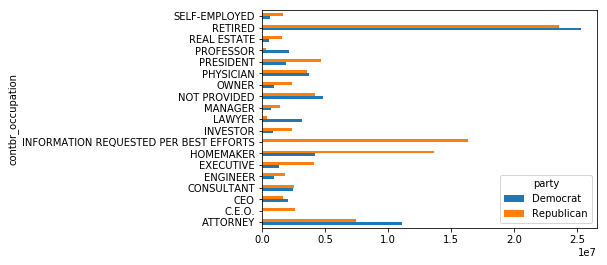

In [281]:
by_occupation = fec.pivot_table('contb_receipt_amt', index = 'contbr_occupation',
                               columns = 'party', aggfunc = 'sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm
over_2mm.plot(kind = 'barh')

In [298]:
def get_top_amounts(group, key, n = 5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending = False)[n: ]
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n = 7)
grouped.apply(get_top_amounts, 'contbr_employer', n = 1)

cand_nm        contbr_employer                
Obama, Barack  SELF-EMPLOYED                      17080985.96
               NOT EMPLOYED                        8586308.70
               INFORMATION REQUESTED               5053480.37
               HOMEMAKER                           2605408.54
               SELF                                1076531.20
               SELF EMPLOYED                        469290.00
               STUDENT                              318831.45
               VOLUNTEER                            257104.00
               MICROSOFT                            215585.36
               SIDLEY AUSTIN LLP                    168254.00
               REFUSED                              149516.07
               DLA PIPER                            148235.00
               HARVARD UNIVERSITY                   131368.94
               IBM                                  128490.93
               GOOGLE                               125302.88
               MICROSOF

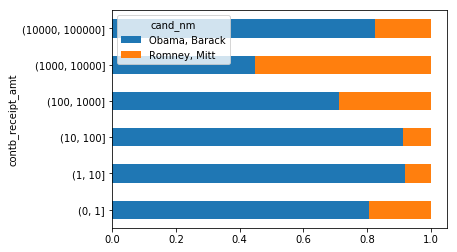

In [309]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums
normed_sums = bucket_sums.div(bucket_sums.sum(axis = 1), axis = 0)
normed_sums
normed_sums[: -2].plot(kind = 'barh', stacked = True)